## Loading Datasets and Prerprocessing

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
internet = pd.read_csv('/Users/andrewmasco/Downloads/final_provider/internet.csv')
phone = pd.read_csv('/Users/andrewmasco/Downloads/final_provider/phone.csv')
contract = pd.read_csv('/Users/andrewmasco/Downloads/final_provider/contract.csv')
personal = pd.read_csv('/Users/andrewmasco/Downloads/final_provider/personal.csv')

In [3]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [4]:
internet.rename(columns={'customerID':'customer_id', 
                         'InternetService':'internet_service', 
                         'OnlineSecurity':'online_security', 
                         'OnlineBackup':'online_backup', 
                         'DeviceProtection':'device_protection',
                         'TechSupport':'tech_support',
                         'StreamingTV':'streaming_tv',
                         'StreamingMovies':'streaming_movies'}, inplace=True)

Renaming the columns using all lowercase and underscores between words.

In [5]:
internet.sample(10)

,customer_id,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
1922,8263-JQAIK,DSL,No,No,No,No,No,No
2925,0508-OOLTO,Fiber optic,No,No,No,No,No,No
5272,5245-VDBUR,DSL,Yes,No,Yes,No,No,No
2187,2790-XUYMV,Fiber optic,Yes,Yes,No,No,No,No
5152,5702-KVQRD,DSL,Yes,No,Yes,Yes,Yes,Yes
2082,5609-IMCGG,Fiber optic,Yes,No,Yes,No,No,No
531,8100-PNJMH,DSL,Yes,Yes,Yes,Yes,Yes,Yes
1151,8445-DNBAE,DSL,No,No,No,No,No,No
4108,5419-JKZNQ,Fiber optic,No,No,No,No,No,No
3729,8760-ZRHKE,DSL,Yes,Yes,No,No,Yes,No


In [6]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [7]:
phone.rename(columns={'customerID':'customer_id', 'MultipleLines':'multiple_lines'}, inplace=True)

Renaming the columns using all lowercase and underscores between words.

In [8]:
phone.sample(10)

,customer_id,multiple_lines
180,9323-HGFWY,No
3500,3594-UVONA,Yes
2758,1208-DNHLN,Yes
6074,8676-TRMJS,Yes
1467,3399-BMLVW,No
58,5698-BQJOH,Yes
5610,2867-UIMSS,No
2768,1406-PUQVY,No
3416,8885-QSQBX,No
4141,8063-GBATB,Yes


In [9]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [10]:
contract['PaperlessBilling'] = contract['PaperlessBilling'].replace({'Yes': 1, 'No': 0})

/var/folders/_p/7wyn_g2d1979l_5zwf1mld0w0000gn/T/ipykernel_67678/1820259885.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  contract['PaperlessBilling'] = contract['PaperlessBilling'].replace({'Yes': 1, 'No': 0})


Replacing the Yes values with 1 and the No values with 0 in order to make this a numerical feature. 

In [11]:
contract.rename(columns={'customerID':'customer_id', 
                         'BeginDate':'begin_date', 
                         'EndDate':'end_date', 'Type':'type', 
                         'PaperlessBilling':'paperless_billing', 
                         'PaymentMethod':'payment_method', 
                         'MonthlyCharges':'monthly_charges', 
                         'TotalCharges':'total_charges'}, inplace=True)

Renaming the columns using all lowercase and underscores between words.


In [12]:
contract.head(10)

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
0,7590-VHVEG,2020-01-01,No,Month-to-month,1,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,0,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,1,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,0,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,1,Electronic check,70.70,151.65
5,9305-CDSKC,2019-03-01,2019-11-01 00:00:00,Month-to-month,1,Electronic check,99.65,820.5
6,1452-KIOVK,2018-04-01,No,Month-to-month,1,Credit card (automatic),89.10,1949.4
7,6713-OKOMC,2019-04-01,No,Month-to-month,0,Mailed check,29.75,301.9
8,7892-POOKP,2017-07-01,2019-11-01 00:00:00,Month-to-month,1,Electronic check,104.80,3046.05
9,6388-TABGU,2014-12-01,No,One year,0,Bank transfer (automatic),56.15,3487.95


In [13]:
contract['total_charges'] = pd.to_numeric(contract['total_charges'], errors='coerce')

Converting the total charges column into float64 type.

In [14]:
contract['begin_date'] = pd.to_datetime(contract['begin_date'])

Converting the begin_date column into date type.

In [15]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   object        
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   int64         
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7032 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 440.3+ KB


In [16]:
#singling out the missing values to observe them and best see how to deal with them
contract_na = contract[contract.isna().any(axis=1)]

In [17]:
contract_na

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
488,4472-LVYGI,2020-02-01,No,Two year,1,Bank transfer (automatic),52.55,NaN
753,3115-CZMZD,2020-02-01,No,Two year,0,Mailed check,20.25,NaN
936,5709-LVOEQ,2020-02-01,No,Two year,0,Mailed check,80.85,NaN
1082,4367-NUYAO,2020-02-01,No,Two year,0,Mailed check,25.75,NaN
1340,1371-DWPAZ,2020-02-01,No,Two year,0,Credit card (automatic),56.05,NaN
3331,7644-OMVMY,2020-02-01,No,Two year,0,Mailed check,19.85,NaN
3826,3213-VVOLG,2020-02-01,No,Two year,0,Mailed check,25.35,NaN
4380,2520-SGTTA,2020-02-01,No,Two year,0,Mailed check,20.00,NaN
5218,2923-ARZLG,2020-02-01,No,One year,1,Mailed check,19.70,NaN
6670,4075-WKNIU,2020-02-01,No,Two year,0,Mailed check,73.35,NaN


While looking at the rows that contain missing values for the total_charges column, we can see that all of these customers have just started the contract on 2020-02-01, which from the project description we know that this is the date that contract information is valid from. Because these contracts were started the same day that the data has been taken from, these accounts haven't technically been charged anything yet. With that in mind, we can replace the missing values with 0.0, because there have been 0 total charges for these accounts. 

In [18]:
contract.fillna(0.0, inplace=True)

In [19]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   object        
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   int64         
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 440.3+ KB


In [20]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [21]:
personal = personal.replace({'Yes': 1, 'No': 0})

/var/folders/_p/7wyn_g2d1979l_5zwf1mld0w0000gn/T/ipykernel_67678/2337984258.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  personal = personal.replace({'Yes': 1, 'No': 0})


Replacing the Yes values with 1 and the No values with 0 in order to make this a numerical feature. 

In [22]:
personal = personal.rename(columns={'customerID': 'customer_id', 'SeniorCitizen':'senior_citizen', 'Partner':'partner', 'Dependents':'dependents'})

Renaming the columns using all lowercase and underscores between words.


In [23]:
personal.head(10)

,customer_id,gender,senior_citizen,partner,dependents
0,7590-VHVEG,Female,0,1,0
1,5575-GNVDE,Male,0,0,0
2,3668-QPYBK,Male,0,0,0
3,7795-CFOCW,Male,0,0,0
4,9237-HQITU,Female,0,0,0
5,9305-CDSKC,Female,0,0,0
6,1452-KIOVK,Male,0,0,1
7,6713-OKOMC,Female,0,0,0
8,7892-POOKP,Female,0,1,0
9,6388-TABGU,Male,0,0,1


In [24]:
full = contract.merge(personal, on='customer_id', how='outer')

In [25]:
full = full.merge(phone, on='customer_id', how='outer')

In [26]:
full.head(10)

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,multiple_lines
0,0002-ORFBO,2019-05-01,No,One year,1,Mailed check,65.60,593.30,Female,0,1,1,No
1,0003-MKNFE,2019-05-01,No,Month-to-month,0,Mailed check,59.90,542.40,Male,0,0,0,Yes
2,0004-TLHLJ,2019-09-01,2020-01-01 00:00:00,Month-to-month,1,Electronic check,73.90,280.85,Male,0,0,0,No
3,0011-IGKFF,2018-12-01,2020-01-01 00:00:00,Month-to-month,1,Electronic check,98.00,1237.85,Male,1,1,0,No
4,0013-EXCHZ,2019-09-01,2019-12-01 00:00:00,Month-to-month,1,Mailed check,83.90,267.40,Female,1,1,0,No
5,0013-MHZWF,2019-05-01,No,Month-to-month,1,Credit card (automatic),69.40,571.45,Female,0,0,1,No
6,0013-SMEOE,2014-03-01,No,Two year,1,Bank transfer (automatic),109.70,7904.25,Female,1,1,0,No
7,0014-BMAQU,2014-11-01,No,Two year,1,Credit card (automatic),84.65,5377.80,Male,0,1,0,Yes
8,0015-UOCOJ,2019-07-01,No,Month-to-month,1,Electronic check,48.20,340.35,Female,1,0,0,No
9,0016-QLJIS,2014-09-01,No,Two year,1,Mailed check,90.45,5957.90,Female,0,1,1,Yes


In [27]:
full = full.merge(internet, on='customer_id', how='outer')

In [28]:
full = full.fillna('n/a')

In [29]:
full.sample(10)

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
6522,9253-VIFJQ,2014-09-01,No,One year,0,Credit card (automatic),67.05,4309.55,Male,0,1,0,Yes,DSL,Yes,Yes,Yes,No,No,No
6329,8963-MQVYN,2018-04-01,No,Month-to-month,1,Electronic check,20.55,469.85,Female,0,0,1,No,n/a,n/a,n/a,n/a,n/a,n/a,n/a
2503,3580-HYCSP,2014-02-01,No,Two year,1,Bank transfer (automatic),110.30,7966.90,Male,0,1,1,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes
2877,4102-HLENU,2014-07-01,No,Two year,0,Mailed check,65.65,4322.85,Female,0,1,0,Yes,DSL,Yes,Yes,Yes,No,No,No
4990,7016-NVRIC,2017-09-01,No,One year,0,Bank transfer (automatic),90.10,2656.70,Male,1,1,0,No,Fiber optic,Yes,No,Yes,No,No,Yes
6466,9150-KPBJQ,2019-08-01,No,Two year,0,Credit card (automatic),19.65,116.85,Female,0,0,0,No,n/a,n/a,n/a,n/a,n/a,n/a,n/a
2872,4091-TVOCN,2016-02-01,No,One year,1,Credit card (automatic),78.75,3682.45,Male,0,0,1,Yes,DSL,Yes,No,Yes,No,Yes,Yes
563,0829-DDVLK,2018-11-01,No,One year,0,Credit card (automatic),20.10,302.45,Female,0,0,0,No,n/a,n/a,n/a,n/a,n/a,n/a,n/a
5619,7919-ZODZZ,2019-04-01,No,One year,1,Mailed check,65.90,660.05,Female,0,1,1,No,DSL,No,Yes,Yes,No,No,Yes
6158,8722-PRFDV,2014-03-01,No,Two year,0,Credit card (automatic),77.55,5574.35,Female,0,1,1,No,DSL,Yes,No,Yes,No,Yes,Yes


In [30]:
full.sample(10)

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
6935,9838-BFCQT,2014-02-01,No,Two year,0,Mailed check,26.10,1851.45,Male,0,1,1,Yes,n/a,n/a,n/a,n/a,n/a,n/a,n/a
1379,2040-VZIKE,2016-01-01,No,Month-to-month,1,Mailed check,100.85,4847.35,Female,0,1,0,Yes,Fiber optic,Yes,No,No,No,Yes,Yes
3012,4311-QTTAI,2018-10-01,No,One year,0,Credit card (automatic),19.35,295.55,Female,0,0,0,No,n/a,n/a,n/a,n/a,n/a,n/a,n/a
958,1391-UBDAR,2019-03-01,No,Month-to-month,0,Electronic check,72.90,818.45,Male,0,0,0,No,Fiber optic,No,No,Yes,No,No,No
2014,2905-KFQUV,2019-12-01,No,Month-to-month,1,Credit card (automatic),70.40,154.80,Female,0,1,0,No,Fiber optic,No,No,No,No,No,No
6153,8715-KKTFG,2015-01-01,No,One year,1,Bank transfer (automatic),103.30,6518.35,Female,0,1,0,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes
3651,5160-UXJED,2018-09-01,No,One year,0,Mailed check,44.60,681.40,Male,0,0,1,No,DSL,No,No,No,No,No,No
6402,9067-SQTNS,2016-06-01,No,One year,0,Bank transfer (automatic),20.60,926.00,Male,0,1,1,No,n/a,n/a,n/a,n/a,n/a,n/a,n/a
4052,5707-ZMDJP,2015-09-01,No,Two year,1,Mailed check,69.70,3729.60,Male,0,1,1,No,DSL,Yes,Yes,No,Yes,Yes,No
273,0404-AHASP,2014-02-01,No,Two year,0,Credit card (automatic),19.70,1421.90,Male,0,1,0,No,n/a,n/a,n/a,n/a,n/a,n/a,n/a


In [31]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   object        
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   int64         
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   float64       
 8   gender             7043 non-null   object        
 9   senior_citizen     7043 non-null   int64         
 10  partner            7043 non-null   int64         
 11  dependents         7043 non-null   int64         
 12  multiple_lines     7043 non-null   object        
 13  internet_service   7043 non-null   object        
 14  online_s

In [32]:
full['has_ended'] = full['end_date']

In [33]:
full['has_ended'].loc[(full['has_ended'] != 'No')] = 'Yes'

/var/folders/_p/7wyn_g2d1979l_5zwf1mld0w0000gn/T/ipykernel_67678/3232469220.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  full['has_ended'].loc[(full['has_ended'] != 'No')] = 'Yes'
/var/folders/_p/7wyn_g2d1979l_5zwf1mld0w0000gn/T/ipyke

Created a new column called 'has_ended' that is the same as 'end_date' column, but have changed any value that was an actual end date into a simple Yes value. This column will make it easier to work with the target, as all we are really looking for is whether or not the customer has ended their service, and not so much when they have ended it. 

In [34]:
full.sample(10)

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,...,dependents,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,has_ended
4192,5919-VCZYM,2019-12-01,No,Month-to-month,0,Mailed check,20.05,42.70,Male,0,...,0,No,n/a,n/a,n/a,n/a,n/a,n/a,n/a,No
1027,1482-OXZSY,2017-08-01,No,Month-to-month,1,Bank transfer (automatic),100.40,2936.25,Male,0,...,0,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,No
2919,4163-HFTUK,2015-11-01,No,One year,0,Electronic check,19.10,1007.80,Male,0,...,0,No,n/a,n/a,n/a,n/a,n/a,n/a,n/a,No
4344,6128-AQBMT,2016-09-01,No,Month-to-month,1,Electronic check,53.95,2215.40,Male,1,...,0,n/a,DSL,No,Yes,Yes,No,Yes,Yes,No
2321,3318-OSATS,2017-01-01,2019-12-01 00:00:00,Month-to-month,1,Electronic check,95.45,3474.05,Male,1,...,0,Yes,Fiber optic,No,No,No,No,Yes,Yes,Yes
2189,3137-LUPIX,2019-10-01,No,Month-to-month,1,Mailed check,64.40,253.00,Female,0,...,0,Yes,DSL,No,No,No,Yes,Yes,No,No
6969,9889-TMAHG,2019-03-01,2019-11-01 00:00:00,Month-to-month,0,Credit card (automatic),100.30,832.35,Male,1,...,0,No,Fiber optic,Yes,No,No,Yes,Yes,Yes,Yes
272,0402-OAMEN,2014-02-01,No,Two year,0,Bank transfer (automatic),24.45,1709.10,Female,0,...,1,Yes,n/a,n/a,n/a,n/a,n/a,n/a,n/a,No
3887,5468-BPMMO,2016-04-01,No,Month-to-month,0,Electronic check,19.60,851.20,Male,0,...,0,No,n/a,n/a,n/a,n/a,n/a,n/a,n/a,No
6997,9929-PLVPA,2019-10-01,No,Month-to-month,0,Credit card (automatic),20.40,94.50,Female,0,...,1,No,n/a,n/a,n/a,n/a,n/a,n/a,n/a,No


In [35]:
full['begin_year'] = full['begin_date'].dt.year
full['begin_month'] = full['begin_date'].dt.month
full['begin_day'] = full['begin_date'].dt.day

Separating the begin_date column into year, month, and day so that they can be used as numerical features and make it easier to check for seasonality. With that being said, every begin_day is the first of the month, so this is an unnecessary feature to use as every contract begins on the first of the month. We are only going to be interested in begin_year and begin_month. 

## EDA

In [36]:
begin_totals = full['begin_year'].value_counts().sort_index()
begin_totals

begin_year
2013       8
2014    1344
2015     852
2016     763
2017     845
2018    1030
2019    1957
2020     244
Name: count, dtype: int64

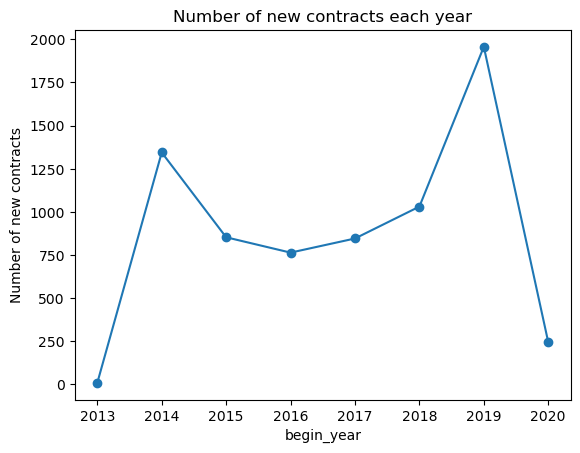

In [37]:
begin_totals.plot(kind='line', x='begin_year', ylabel='Number of new contracts', marker='o', title='Number of new contracts each year')
plt.show()

Above we can see that Interconnect was on a downward trend of new contracts from 2014-2016, but has since seen a positve trend in new contracts each year suggesting that they have been doing a good job of attracting more customers each year. We will find out whether or not they have been doing a good job of retaining those new customers. 

In [38]:
full.groupby('begin_year')['has_ended'].value_counts()

begin_year  has_ended
2013        Yes             8
2014        No           1246
            Yes            98
2015        No            729
            Yes           123
2016        No            618
            Yes           145
2017        No            646
            Yes           199
2018        No            715
            Yes           315
2019        Yes           981
            No            976
2020        No            244
Name: count, dtype: int64

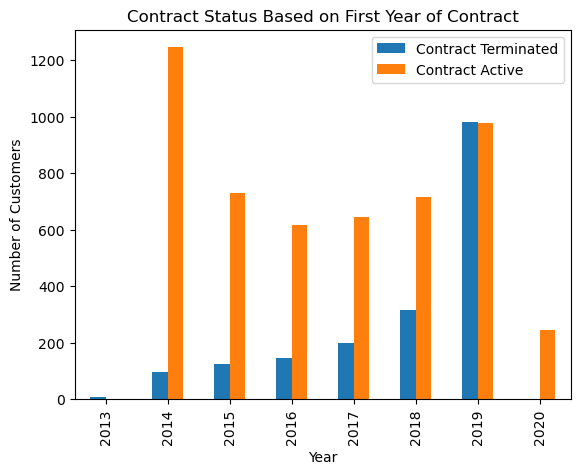

In [39]:
cols = ['Year','Yes','No']
data = [[2013, 8, 0],
        [2014, 98, 1246],
        [2015, 123, 729],
        [2016, 145, 618],
        [2017, 199, 646],
        [2018, 315, 715],
        [2019, 981, 976],
        [2020, 0, 244]]
begin_counts = pd.DataFrame(data=data, columns=cols)
begin_counts.plot(title='Contract Status Based on First Year of Contract', 
                  kind='bar',
                  x='Year',
                  ylabel='Number of Customers')
plt.legend(['Contract Terminated', 'Contract Active'])
plt.show()

When looking at the above grouped data and plot, we see that the customers who have been using Interconnect's services the longest are the ones who are most likely to continue using their services. The percentage of customers who have ended their contract actually increases for those who have began their in contract in more recent years conpared to those who started their contract in years prior. For example, only 7.3% of customers who began their contracts in 2014 have since terminated their contracts, but 50.1% of customers whose contracts began in 2019 have since terminated their contracts. What this shows us is Interconnect has done a better job of retaining the customers that have been with them the longest, but has struggled to retain their newer customers. So despite gaining more customers each year over the last few years, they have not done a great job of retaining the increased volume. 

In [40]:
full.groupby('type')['has_ended'].value_counts()

type            has_ended
Month-to-month  No           2220
                Yes          1655
One year        No           1307
                Yes           166
Two year        No           1647
                Yes            48
Name: count, dtype: int64

In the grouping shown above, I am comparing how many contracts have been terminated and are still active based on the type of contract the customer has. We can see that custtomers who are on month-to-month contracts are much more likely to terminate their contracts than those on one year or two year contracts. 42.7% of customers who were on month-to-month contracts have terminated their contract, as opposed to just 11.3% on one year and 2.8% on two year. Interconnect should focus more on sending promotional material to try and retain the customers on month-to-month contracts, as they are much more likely to end their contract than those on yearly contracts. 

In [41]:
full.groupby('payment_method')['has_ended'].value_counts()

payment_method             has_ended
Bank transfer (automatic)  No           1286
                           Yes           258
Credit card (automatic)    No           1290
                           Yes           232
Electronic check           No           1294
                           Yes          1071
Mailed check               No           1304
                           Yes           308
Name: count, dtype: int64

In looking at if there is any trend among the payment methods used, and whether or not a contract has been terminated, we can see that those who pay their bill with electronic checks are much more likely to end their contract than those using any of the other payment methods. This is an interesting trend, but I'm not quite sure what could be the cause of this. It makes sense that those with automatic payment methods are more likely to continue their contract, because it might be a more out-of-sight out-of-mind procedure, but I would've thought those that use Mailed checks would have a higher cancellation rate. 

In [42]:
full.groupby('gender')['has_ended'].value_counts()

gender  has_ended
Female  No           2549
        Yes           939
Male    No           2625
        Yes           930
Name: count, dtype: int64

The gender of the customer does not seem to show a significant difference in whether or not they will end their contract or not. About 26% of for both genders have terminated their contract, so almost equal. 

In [43]:
full.groupby('internet_service')['has_ended'].value_counts()

internet_service  has_ended
DSL               No           1962
                  Yes           459
Fiber optic       No           1799
                  Yes          1297
n/a               No           1413
                  Yes           113
Name: count, dtype: int64

Lastly, when looking at the type of internet service the customer has, I have noticed a couple of interesting things. Those who have Fiber optic(41.9% terminated) are much more likely to terminate their contract than those who have DSL(19% terminated). This could suggest that Interconnect's DSL outperforms their competitors, but their Fiber optic does not perform as well when compared to their competitors. I also noticed that of the customers who only use Interconnect's phone service (denoted by n/a above), only 7.4% have ended their contracts. This could suggest that their phone service performs well, and that they need to focus more on trying to retain their customers who use their internet service. 

## Feature Engineering

In [44]:
full = full.drop(columns=['begin_date', 'begin_day', 'end_date'])

In [45]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   type               7043 non-null   object 
 2   paperless_billing  7043 non-null   int64  
 3   payment_method     7043 non-null   object 
 4   monthly_charges    7043 non-null   float64
 5   total_charges      7043 non-null   float64
 6   gender             7043 non-null   object 
 7   senior_citizen     7043 non-null   int64  
 8   partner            7043 non-null   int64  
 9   dependents         7043 non-null   int64  
 10  multiple_lines     7043 non-null   object 
 11  internet_service   7043 non-null   object 
 12  online_security    7043 non-null   object 
 13  online_backup      7043 non-null   object 
 14  device_protection  7043 non-null   object 
 15  tech_support       7043 non-null   object 
 16  streaming_tv       7043 

In [46]:
full['has_ended'] = full['has_ended'].replace({'Yes': 1, 'No': 0})

/var/folders/_p/7wyn_g2d1979l_5zwf1mld0w0000gn/T/ipykernel_67678/1602963044.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  full['has_ended'] = full['has_ended'].replace({'Yes': 1, 'No': 0})


In [47]:
full_encoded = pd.get_dummies(full, columns=['type', 'payment_method', 'gender', 'multiple_lines', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies'], dtype=int, drop_first=True)

Used one hot encoding on all of the categorical features to make them numerical.

## Building the Models

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score


X = full_encoded.drop(['has_ended', 'customer_id'], axis=1)
y = full_encoded['has_ended']

# Split data into training + validation set and test set
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=315)

# Further split the training set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=315)
   

In [49]:
#Scaling the numerical features
numerical_features = ['monthly_charges', 'total_charges', 'begin_year', 'begin_month']

scaler = StandardScaler()

#Fit the scaler on the training data
scaler.fit(X_train[numerical_features])

#transform the training, validation, and test data
X_train[numerical_features] = scaler.transform(X_train[numerical_features])
X_valid[numerical_features] = scaler.transform(X_valid[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

### Logistic Regression 

In [50]:
log = LogisticRegression(random_state=315, solver='liblinear')
log.fit(X_train, y_train)
y_pred = log.predict_proba(X_valid)
y_pred = y_pred[:,1]
roc_auc_log = roc_auc_score(y_valid, y_pred)
print(roc_auc_log)

0.8418914998549463


In [51]:
log_bal = LogisticRegression(random_state=315, solver='liblinear', class_weight='balanced')
log_bal.fit(X_train, y_train)
y_pred = log_bal.predict_proba(X_valid)
y_pred = y_pred[:,1]
roc_auc_log = roc_auc_score(y_valid, y_pred)
print(roc_auc_log)

0.8406878088752489


### Decision Tree Classifier

In [52]:
tree = DecisionTreeClassifier(random_state=315)
tree.fit(X_train, y_train)
y_pred = tree.predict_proba(X_valid)
y_pred = y_pred[:,1]
roc_auc_tree = roc_auc_score(y_valid, y_pred)
print(roc_auc_tree)

0.778352902854758


In [53]:
for depth in range(1, 20):
    tree = DecisionTreeClassifier(random_state=315, max_depth=depth)
    tree.fit(X_train, y_train)
    y_pred = tree.predict_proba(X_valid)
    y_pred = y_pred[:,1]
    roc_auc_tree = roc_auc_score(y_valid, y_pred)
    print('max_depth =', depth, ': ', end='')
    print(f'Decision Tree ROC-AUC: {roc_auc_tree}')

max_depth = 1 : Decision Tree ROC-AUC: 0.6724637238585294
max_depth = 2 : Decision Tree ROC-AUC: 0.7577069305116578
max_depth = 3 : Decision Tree ROC-AUC: 0.8151825385919106
max_depth = 4 : Decision Tree ROC-AUC: 0.8488438968032207
max_depth = 5 : Decision Tree ROC-AUC: 0.8664335628744039
max_depth = 6 : Decision Tree ROC-AUC: 0.8702749403244113
max_depth = 7 : Decision Tree ROC-AUC: 0.8723375017177408
max_depth = 8 : Decision Tree ROC-AUC: 0.8641368797683214
max_depth = 9 : Decision Tree ROC-AUC: 0.8497625700456537
max_depth = 10 : Decision Tree ROC-AUC: 0.8370080263030656
max_depth = 11 : Decision Tree ROC-AUC: 0.8186485578611455
max_depth = 12 : Decision Tree ROC-AUC: 0.8011072430132482
max_depth = 13 : Decision Tree ROC-AUC: 0.7964769771833121


max_depth = 14 : Decision Tree ROC-AUC: 0.7884506741178446
max_depth = 15 : Decision Tree ROC-AUC: 0.7888183978949405
max_depth = 16 : Decision Tree ROC-AUC: 0.7847988843591428
max_depth = 17 : Decision Tree ROC-AUC: 0.7836409998015056
max_depth = 18 : Decision Tree ROC-AUC: 0.7849032212093915
max_depth = 19 : Decision Tree ROC-AUC: 0.7899432000366452


Max Depth of 7 yields the best ROC-AUC score, so we will continue with this max_depth moving forward for this model.

In [54]:
tree = DecisionTreeClassifier(random_state=315, max_depth=7)
tree.fit(X_train, y_train)
y_pred = tree.predict_proba(X_valid)
y_pred = y_pred[:,1]
roc_auc_tree = roc_auc_score(y_valid, y_pred)
print(roc_auc_tree)

0.8723375017177408


### Random Forest Classifier

In [55]:
rando = RandomForestClassifier(random_state=315)
rando.fit(X_train, y_train)
y_pred = rando.predict_proba(X_valid)
y_pred = y_pred[:,1]
roc_auc_rando = roc_auc_score(y_valid, y_pred)
print(roc_auc_rando)

0.8752143995032546


In [56]:
best_roc_auc = 0
best_est = 0
for est in range(100, 201):
    rando = RandomForestClassifier(random_state=315, n_estimators=est)
    rando.fit(X_train, y_train)
    y_pred = rando.predict_proba(X_valid)
    y_pred = y_pred[:,1]
    roc_auc_rando = roc_auc_score(y_valid, y_pred)
    if roc_auc_rando > best_roc_auc:
        best_roc_auc = roc_auc_rando
        best_est = est
print('ROC-AUC of the best model is (n_estimators = {}): {}'.format(best_est, best_roc_auc))

ROC-AUC of the best model is (n_estimators = 189): 0.8790926765710331


n_estimators with the value of 189 is what gives us the best ROC-AUC score for this model, so this is the n_estimators we will use moving forward with this model. 

### Final Model Tests

In [57]:
log = LogisticRegression(random_state=315, solver='liblinear')
log.fit(X_train, y_train)
y_pred = log.predict_proba(X_test)
y_pred = y_pred[:,1]
roc_auc_log = roc_auc_score(y_test, y_pred)
print(roc_auc_log)

0.838383138577125


In [58]:
tree = DecisionTreeClassifier(random_state=315, max_depth=7)
tree.fit(X_train, y_train)
y_pred = tree.predict_proba(X_test)
y_pred = y_pred[:,1]
roc_auc_tree = roc_auc_score(y_test, y_pred)
print(f'Decision Tree ROC-AUC: {roc_auc_tree}')

Decision Tree ROC-AUC: 0.8517081582067033


In [59]:
rando = RandomForestClassifier(random_state=315, n_estimators=189)
rando.fit(X_train, y_train)
y_pred = rando.predict_proba(X_test)
y_pred = y_pred[:,1]
roc_auc_rando = roc_auc_score(y_test, y_pred)
predicted_test = rando.predict(X_test)
accuracy_test = accuracy_score(y_test, predicted_test)
print(f'Random Forest ROC-AUC: {roc_auc_rando}')
print(f'Random Forest Accuracy:{accuracy_test}')

Random Forest ROC-AUC: 0.872987647478433
Random Forest Accuracy:0.8325053229240597


## Conclusion 
After taking a closer look at Interconnect's data, I have found a few factors that indicate a higher likelihood that a customer will end their contract with them. Despite attracting more customers in the recent years, a much larger percentage of customers who began their contract in those recent years (2018-2019) have ended their contracts already. Those who have been using Interconnect's services the longest have been the most loyal base of customers. I also noticed that customers who are on month-to-month contracts are much more likely to end their contract than those who are on one-year or two-year contracts.  Additionally, customers who pay their bills using electronic checks are much more likely to end their contract than those using any of the other payment methods. The last thing I noticed, specifically among customers with internet service, is that those with fiber optic internet are much more likely to cancel their contract in comparison to those who have DSL. With all of that in mind, Interconnect could focus on sending promotional materials aimed at retaining the customer for any of the customers who fall into the above categories. \
\
After creating multiple models, and tuning them to perform as optimal as possible, it seems that the Random Forest Classifier model is the best model for this task. ROC-AUC score was the desired metric for measuring the success of the models, and my Random Forest Classifier outperformed the Logistic Regression and Decision Tree Classifier models. I was able to achieve a ROC-AUC of 0.85, thus making the Random Forest Classifier the best model for this task. 